In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sys
import function as func
from scipy import special
import lmfit
import csv
import fit_script as fit

In [2]:
def gause_model(x, mean, sigma, height):
    return height * np.exp( -1./2. * ((x-mean)/sigma) ** 2.)

def gause_residual(params, x, y, yerr):
    mean = params['mean']
    sigma = params['sigma']
    height = params['height']
    y_model = gause_model(x, mean, sigma, height)
    chi = (y - y_model)/yerr
    a = np.isfinite(chi)
    return chi[a]

In [4]:
frequency = np.array([])
Watt = np.array([])

for i in range(180, 265, 1):
    if i % 10 == 0: print(i)
    start_freq = i/10
    
    initial = int(start_freq * 1.e+6 - 250)
    final = int(initial + 1.e+5)

    for j in range(initial, final, 2000):
        word = list(str(j))
        word.insert(2, ".")
        start = "".join(word)
        
        _f = np.zeros(26215)
        _W = np.zeros(26215)
        
        for k in range(12):
            path = "/data/ms2840a/signal_raw_data/scan_FFT_{}GHz_span2.50MHz_rbw0.3kHz_2.0sec_1counts_12runs_{}.dat".format(start, k)
            freq, W = func.dat_to_array(path)
            freq, W = func.cut_data(freq, W)
            _f += freq
            _W += W
            
        frequency = np.append(frequency, _f/12/1e+9)
        Watt = np.append(Watt, _W/12)

180
190
200
210
220
230
240
250
260


In [8]:
with open("/data/ms2840a/result_data/signal_raw_data.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerow(["freq", "W"])
    for i in range(len(Watt)):
        writer.writerow([frequency[i], Watt[i]])

In [3]:
raw = func.csv_to_array("/data/ms2840a/result_data/real_data.csv")

In [4]:
fr = {
    "freq": np.array([]), 
    "a": np.array([]), 
    "b": np.array([]), 
    "P": np.array([]), 
    "a_err": np.array([]), 
    "b_err": np.array([]), 
    "P_err": np.array([]), 
    "redchi": np.array([])
}

for i in range(180, 264, 1):
    word = list(str(i))
    word.insert(2, ".")
    start_freq = float("".join(word))

    initial = int(start_freq * 1.e+6 - 250)
    final = int(initial + 1.e+5)

    for j in range(initial, final, 2000):
        word = list(str(j))
        word.insert(2, ".")
        start = "".join(word)

        path = "../data/ms2840a/result_data/fit_result/start_{}GHz.csv".format(start)
        fit_result = func.csv_to_array(path)
        fr["freq"] = np.append(fr["freq"], fit_result["freq_0"]/1.e+9)
        fr["a"] = np.append(fr["a"], fit_result["a"])
        fr["b"] = np.append(fr["b"], fit_result["b"])
        fr["P"] = np.append(fr["P"], fit_result["P"])
        fr["a_err"] = np.append(fr["a_err"], fit_result["a_err"])
        fr["b_err"] = np.append(fr["b_err"], fit_result["b_err"])
        fr["P_err"] = np.append(fr["P_err"], fit_result["P_err"])
        fr["redchi"] = np.append(fr["redchi"], fit_result["redchi"])

0.0028 0.0018
1.0444 0.0013


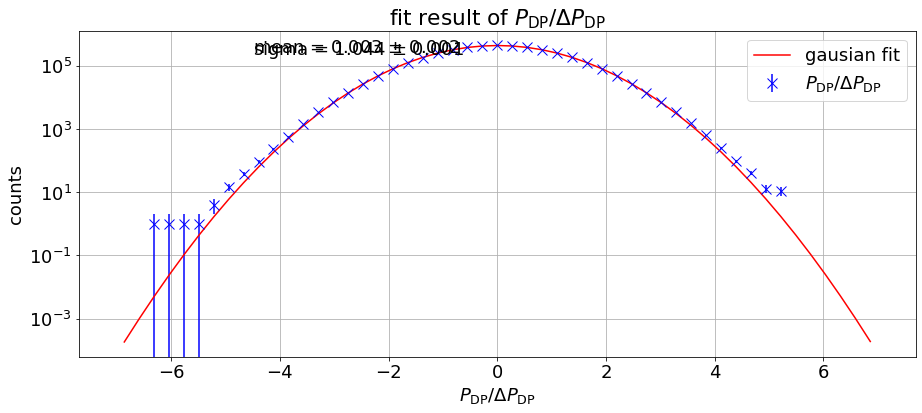

In [8]:
plt.figure(figsize=(15,6))
plt.rcParams["font.size"] = 18
n, bins, hatches = plt.hist(fr["P"]/fr["P_err"], bins=51, range=(-7, 7), color="white")
ne = np.sqrt(n)
x = np.array([(bins[i] + bins[i+1]) / 2 for i in range(len(n))])
col = "blue"
plt.errorbar(x, n, yerr = ne, capsize=0, fmt='x', markersize=10, ecolor=col, markeredgecolor=col, color=col, label=r"$P_{\rm DP}/\Delta P_{\rm DP}$")

params = lmfit.Parameters()
params.add('mean', value=0.)
params.add('sigma', value=1.)
params.add('height', value=1.5e+5)

result = lmfit.minimize(gause_residual, params, args=(x, n, ne))
h = result.params["height"].value
m = result.params["mean"].value
s = result.params["sigma"].value
me = result.params["mean"].stderr
se = result.params["sigma"].stderr
plt.plot(x, gause_model(x, m, s, h), label="gausian fit", color="r")
print(round(m,4), round(me,4))
print(round(s,4), round(se,4))
plt.text(-4.5, 260000, "mean = " + str(round(m, 3)) + r" $\pm$ " + str(round(me, 3)))
plt.text(-4.5, 230000, "sigma = " + str(round(s, 3)) + r" $\pm$ " + str(round(se, 3)))

plt.grid()
plt.xlabel(r"$P_{\rm DP}/\Delta P_{\rm DP}$")
plt.ylabel("counts")
plt.title(r"fit result of $P_{\rm DP}/\Delta P_{\rm DP}$")
plt.yscale("log")
plt.legend()
#plt.ylim([1e-8,2])
#plt.savefig("../result_figure/fit_result/fit_P_over_delta_P.pdf")
    

In [16]:
for i, p in enumerate(local_P):
    if p < 1e-6:
        print(str(freq0[i]) + " & " + str(round(p,10)) + " & " + str(round(redchi[i], 4)) + " \\\\")

18.19081 & 1.037e-07 & 0.7933 \\
18.190812 & 9.59e-08 & 0.7991 \\
18.190814 & 5.661e-07 & 0.821 \\
19.12051 & 3.457e-07 & 0.7922 \\
19.120512 & 1.443e-07 & 0.7909 \\
19.120514 & 1.136e-07 & 0.751 \\
19.187772 & 8.124e-07 & 0.8175 \\
19.441606 & 9.581e-07 & 0.8273 \\
19.479506 & 7.136e-07 & 0.6439 \\
19.81907 & 1.929e-07 & 0.6168 \\
19.819072 & 9.26e-08 & 0.6082 \\
19.819074 & 7.865e-07 & 0.6253 \\
20.29662 & 1.885e-07 & 0.6933 \\
20.296622 & 9.734e-07 & 0.7072 \\
20.893242 & 4.88e-07 & 0.8396 \\
22.673944 & 3.706e-07 & 0.8264 \\
22.673946 & 1.698e-07 & 0.8389 \\
23.808662 & 9.306e-07 & 1.0063 \\
23.808664 & 1.834e-07 & 1.0131 \\
23.808666 & 1.4e-07 & 1.0547 \\
23.935384 & 9.184e-07 & 0.653 \\
23.935386 & 7.38e-08 & 0.6209 \\
25.329954 & 7.225e-07 & 1.0004 \\
25.329956 & 1.322e-07 & 0.963 \\
25.329958 & 5.968e-07 & 0.9527 \\
25.353898 & 9.621e-07 & 0.6542 \\
25.86009 & 6.712e-07 & 0.6884 \\
25.860092 & 5.779e-07 & 0.6796 \\
26.274232 & 4.471e-07 & 0.9145 \\
26.274234 & 3.065e-07 & 0.926

In [89]:
def cut_signal(f0, p, q, ini, fin):
    ff = []
    pp = []
    qq = []
    for i in range(len(f0)):
        if f0[i] > ini and f0[i] < fin:
            ff.append(f0[i])
            pp.append(p[i])
            qq.append(q[i])
    
    return np.array(ff), np.array(pp), np.array(qq)

def get_f0_value(f, a, b, P, f0):
    ff = []
    aa = 0
    bb = 0
    PP = 0
    for i in range(len(f)):
        if f[i] > f0 - 50e-6 and f[i] < f0 + 200e-6:
            ff.append(f[i]*1e+9)
        if f[i] == f0:
            aa = a[i]
            bb = b[i]
            PP = P[i]
            
    return np.array(ff), aa, bb, PP

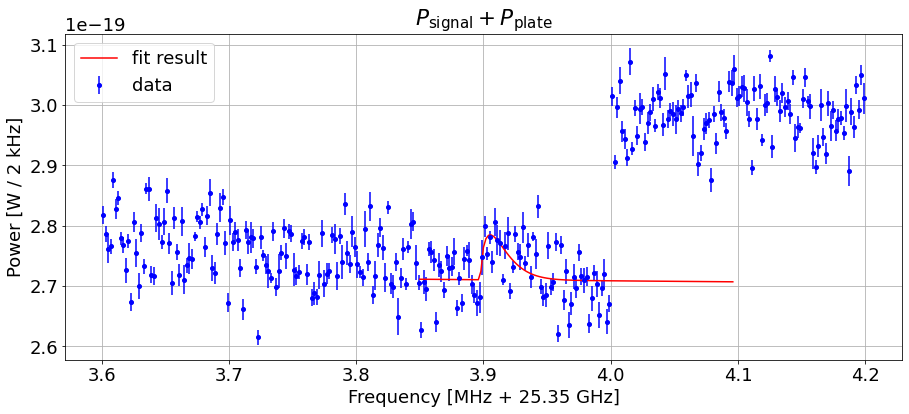

In [126]:
plt.figure(figsize=(15,6))
plt.rcParams["font.size"] = 18

freq, W, We = cut_signal(raw["freq"], raw["W_mean"], raw["W_rebin_std"], 25.3536*1e+9, 25.3542*1e+9)

freq_0 = 25.353898
col = int(freq_0 * (10**2))/(10**2)
fit_f, a, b, P = get_f0_value(fr["freq"], fr["a"], fr["b"], fr["P"], freq_0)
y = fit.fit_func(fit_f, a, b, P, freq_0*1e+9)
plt.errorbar((freq - col*1e+9)/1e+6, W, yerr=We, fmt='o', markersize=4, ecolor='blue', markeredgecolor = "blue", color='blue', label="data")
plt.plot((fit_f - col*1e+9)/1e+6, y, color="red", label="fit result")

plt.grid()
plt.legend()
plt.xlabel("Frequency [MHz + {} GHz]".format(col))
plt.ylabel("Power [W / 2 kHz]")
plt.title(r"$P_{\rm signal} + P_{\rm plate}$")
plt.savefig("../result_figure/under_1e6/{}GHz.pdf".format(freq_0))